In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = "data\\"+file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

In [2]:
data['date'] = pd.to_datetime(data['date'])

In [3]:
data.shape

(488486, 4)

In [4]:
#first messege for each user
data['first_message'] = data.groupby('user').cumcount().apply(lambda x: 1 if x == 0 else 0)

In [5]:
#unique chaterrs each stream
unique_chatters_per_stream = data.groupby('stream')['user'].nunique()

In [6]:
# Calculate the number of first messages per stream
first_messages_per_stream = data.groupby('stream')['first_message'].sum()


# Calculate the total number of messages per stream
total_messages_per_stream = data['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'first_messages': first_messages_per_stream,
    'total_messages': total_messages_per_stream,
    'unique_chatters': unique_chatters_per_stream
})

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

#stream length pre hour
stream_stats['stream_length_hour'] = stream_stats['stream_length'] /60 /60

#stream length per firt
stream_stats['stream_length_per_firt'] = stream_stats['first_messages'] / stream_stats['stream_length_hour'] 

#unique chatters per hour
stream_stats['unique_chatters_per_hour'] = stream_stats['unique_chatters'] / stream_stats['stream_length_hour']


In [7]:
# Calculate mean of first messages
mean_first_messages = stream_stats['first_messages'].mean()

stream_stats['first_messages_avg'] = stream_stats['first_messages'].expanding().mean()

# Bar positions
index = range(len(stream_stats))

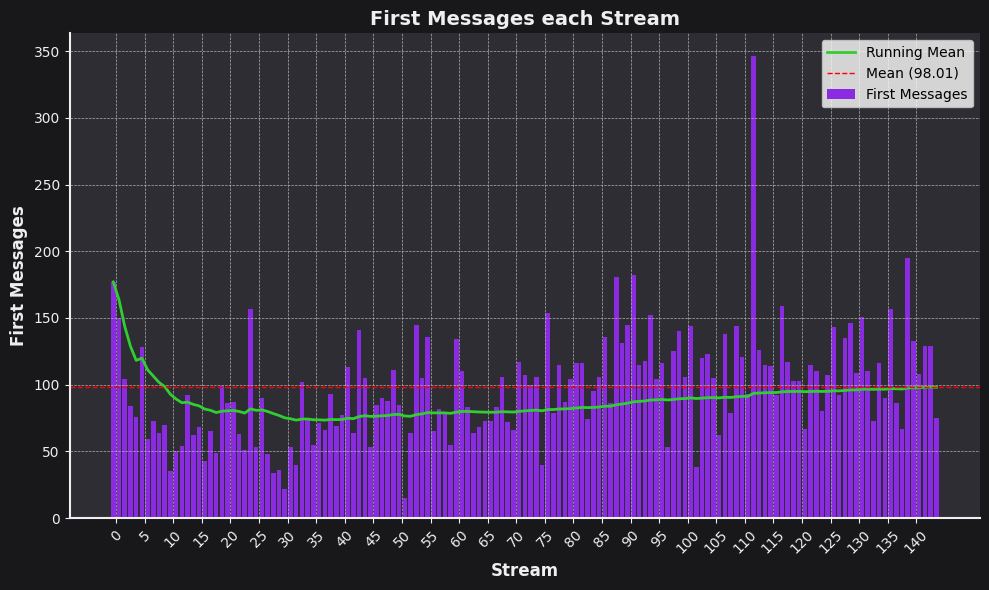

In [8]:
# Plot the chart
fig, ax = plt.subplots(figsize=(10, 6))

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels


# Bar plots
bar1 = ax.bar(index, stream_stats['first_messages'], color='#8A2BE2', alpha=1, label='First Messages')

# Plot the running mean line
ax.plot(index, stream_stats['first_messages_avg'], color='#32CD32', linestyle='-', linewidth=2, label='Running Mean')

# Draw the mean line
ax.axhline(mean_first_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({mean_first_messages:.2f})')

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title
ax.set_xlabel('Stream', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('First Messages', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('First Messages each Stream', fontsize=14, fontweight='bold', color=label_color)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Adjusting x-axis ticks and labels to show every 5th label
xticks = np.arange(0, len(index), 5)
ax.set_xticks([i +1 / 2 for i in xticks])
ax.set_xticklabels(stream_stats.index[xticks], fontsize=10, rotation=45, color=label_color)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Add legend
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


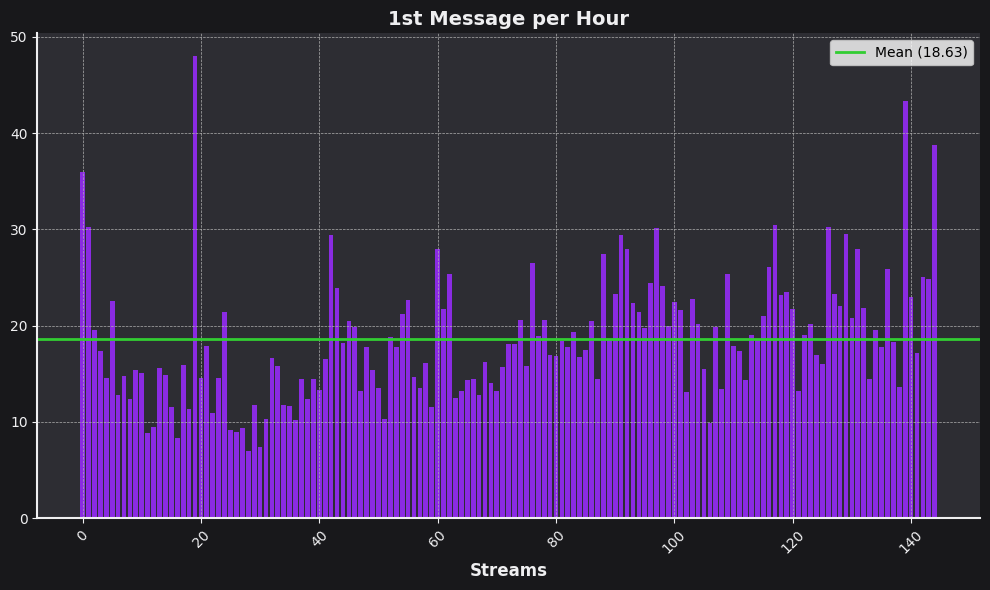

In [9]:
# Plot the chart with custom style
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Bar plot for 'stream_length_per_first' with custom color and transparency
ax.bar(stream_stats.index, 
       stream_stats['stream_length_per_firt'], 
       color='#8A2BE2',  # Custom color for bars
       alpha=1           # Transparency  
      )
# Adding grid with custom style
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Calculate mean of first messages
mean_stream_length_per_firt = stream_stats['stream_length_per_firt'].mean()

# Draw the mean line with custom style
ax.axhline(mean_stream_length_per_firt, 
           color='#32CD32',          # Custom color for mean line
           linestyle='-',           # Line style
           linewidth=2,              # Line width
           label=f'Mean ({mean_stream_length_per_firt:.2f})'
          )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('1st Message per Hour', fontsize=14, fontweight='bold', color=label_color)


# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Rotating x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


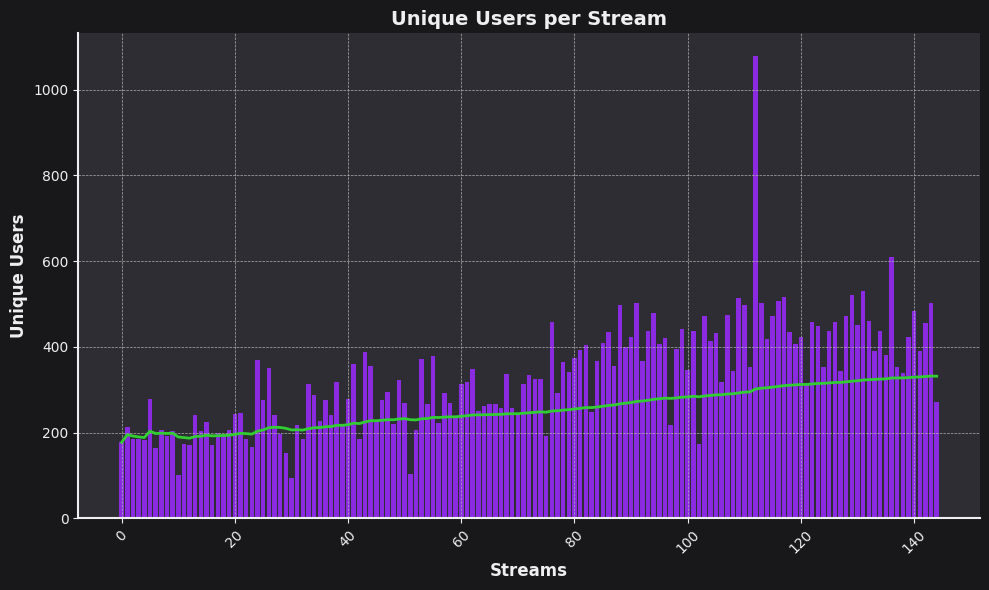

In [10]:
# Plot the chart with custom style
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Bar plot for 'unique_chatters' with custom color and transparency
ax.bar(stream_stats.index, 
       stream_stats['unique_chatters'], 
       color='#8A2BE2',  # Custom color for bars
       alpha=1           # Transparency  
      )

# Calculate mean of unique chatters
mean_stream_unique = stream_stats['unique_chatters'].expanding().mean()

# Draw the mean line with custom style
ax.plot(mean_stream_unique, 
           color='#32CD32',          # Custom color for mean line
           linestyle='-',           # Line style
           linewidth=2,              # Line width
          )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('Unique Users', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('Unique Users per Stream', fontsize=14, fontweight='bold', color=label_color)

# Adding grid with custom style
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Rotating x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

plt.tight_layout()
plt.show()


In [11]:
# Calculate mean of first messages
stream_stats['unique_chatters_per_hour_avg'] = stream_stats['unique_chatters_per_hour'].expanding().mean()

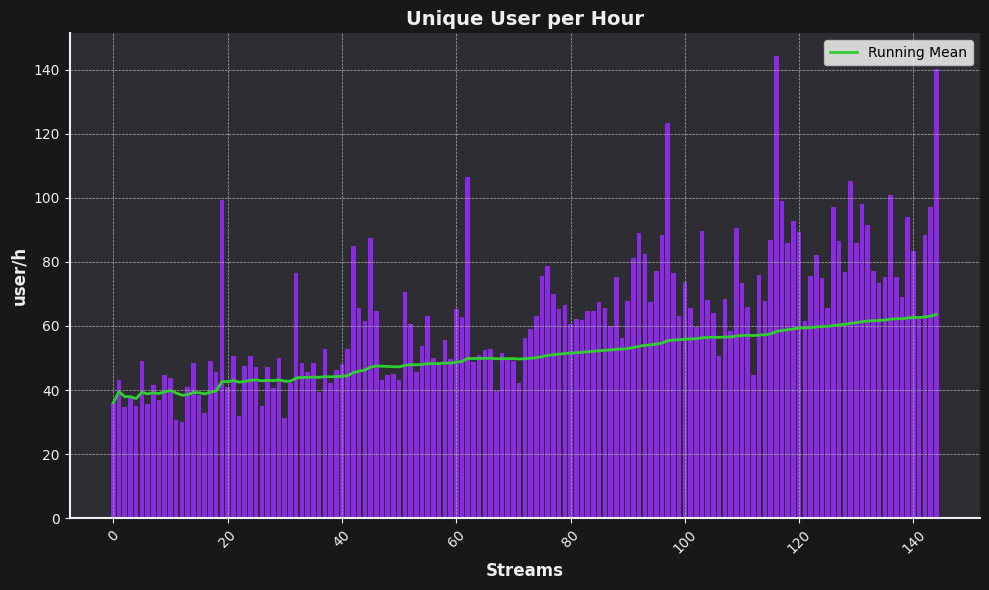

In [12]:

fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels

# Bar plot for 'unique_chatters_per_hour'
ax.bar(stream_stats.index, 
       stream_stats['unique_chatters_per_hour'], 
       color='#8A2BE2',  # Custom color for bars
       alpha=1      # Transparency  
      )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Plot the running mean line
ax.plot(stream_stats.index,  # Ensure this is correctly defined
        stream_stats['unique_chatters_per_hour_avg'], 
        color='#32CD32', 
        linestyle='-', 
        linewidth=2, 
        label='Running Mean'
       )

# Labels and title
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('user/h', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('Unique User per Hour', fontsize=14, fontweight='bold', color=label_color)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Rotating x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


In [13]:
# Group by stream and aggregate users
stream_users = data.groupby('stream')['user'].apply(set).reset_index()
stream_users.columns = ['stream', 'users']

# Initialize columns for returning users and their count
stream_users['returning_users'] = [set()] * len(stream_users)
stream_users['returning_count'] = 0

# Loop through streams to identify returning users
for i in range(1, len(stream_users)):
    current_users = stream_users.at[i, 'users']
    previous_users = stream_users.at[i - 1, 'users']
    
    # Identify returning users
    returning_users = current_users.intersection(previous_users)
    
    # Update dataframe with returning users and their count
    stream_users.at[i, 'returning_users'] = returning_users
    stream_users.at[i, 'returning_count'] = len(returning_users)

In [14]:
stream_stats = pd.merge(stream_stats, stream_users, on='stream', how='right')

In [15]:
# Calculate mean of first messages
stream_stats['returning_count_avg'] = stream_stats['returning_count'].expanding().mean()

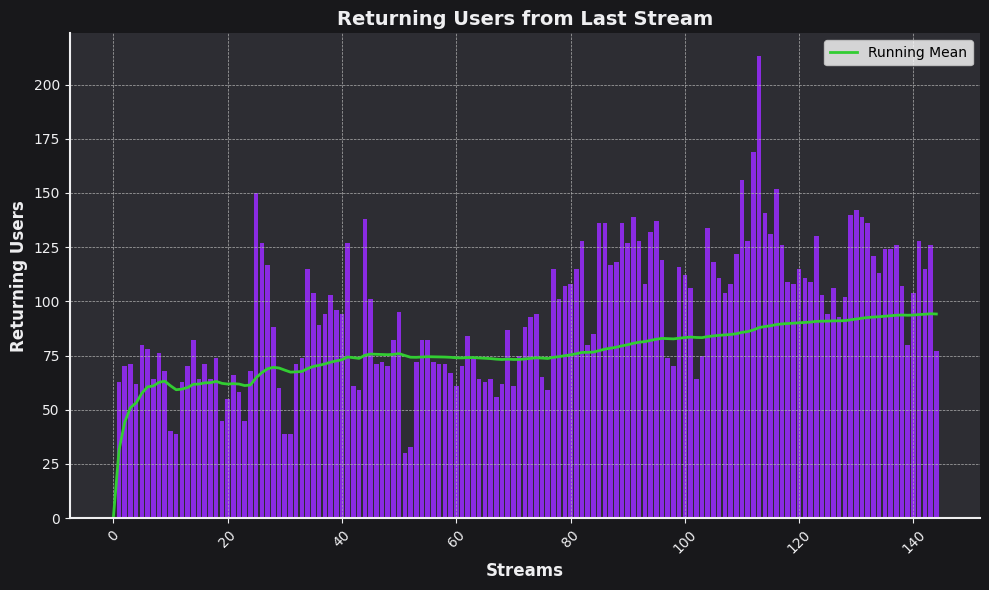

In [16]:
# Plot the chart with custom style
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Bar plot for 'returning_count' with custom color and transparency
ax.bar(stream_stats.index, 
       stream_stats['returning_count'], 
       color='#8A2BE2',  # Custom color for bars
       alpha=1           # Transparency  
      )

# Plot the running mean line with custom style
ax.plot(stream_stats.index, 
        stream_stats['returning_count_avg'], 
        color='#32CD32',          # Custom color for running mean line
        linestyle='-',           # Line style
        linewidth=2,              # Line width
        label='Running Mean'
       )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('Returning Users', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('Returning Users from Last Stream', fontsize=14, fontweight='bold', color=label_color)

# Adding grid with custom style
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Rotating x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


In [17]:
# Create a new column for the first-time chatters by subtracting returning_count from unique_chatters
stream_stats['grouped_return_first'] = stream_stats['returning_count'] + stream_stats['first_messages']

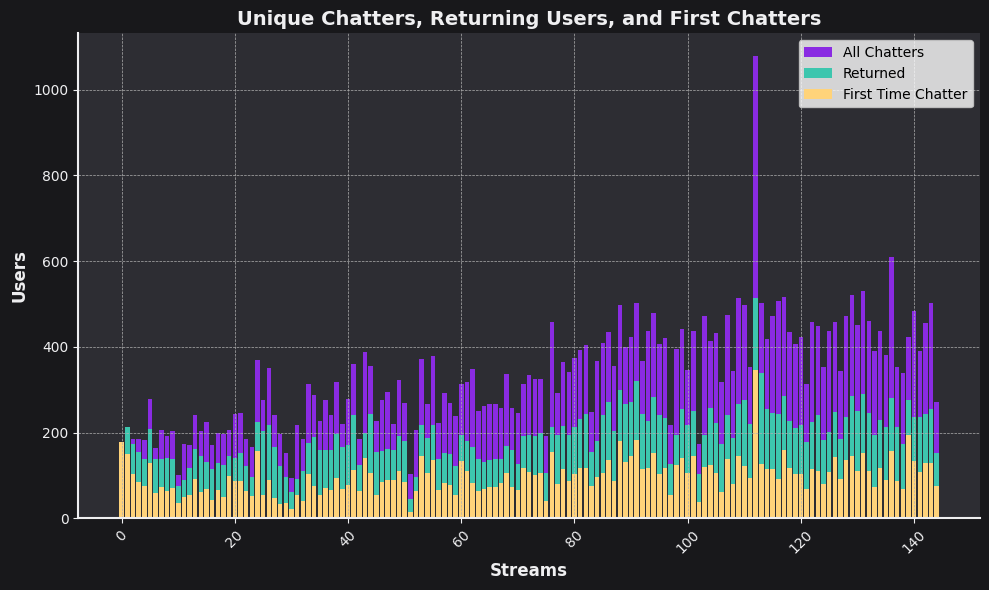

In [18]:
# Plot the bars with specified colors
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Bar plot for all chatters (base layer)
ax.bar(stream_stats.index, 
       stream_stats['unique_chatters'], 
       label='All Chatters', 
       color='#8A2BE2',  # Custom color for the first set of bars (purple)
       alpha=1           # Transparency
      )

# Bar plot for returning users (stacked on top)
ax.bar(stream_stats.index, 
       stream_stats['grouped_return_first'], 
       label='Returned', 
       color='#3DC6AE',  # Custom color for the second set of bars
       alpha=1           # Transparency
      )

# Bar plot for first-time chatters (stacked on top)
ax.bar(stream_stats.index, 
       stream_stats['first_messages'], 
       label='First Time Chatter', 
       color='#FFD37A',  # Custom color for the third set of bars
       alpha=1           # Transparency
      )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('Users', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('Unique Chatters, Returning Users, and First Chatters', fontsize=14, fontweight='bold', color=label_color)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Adding legend to differentiate the bars
ax.legend()

# Rotating x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Adding grid with custom style
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


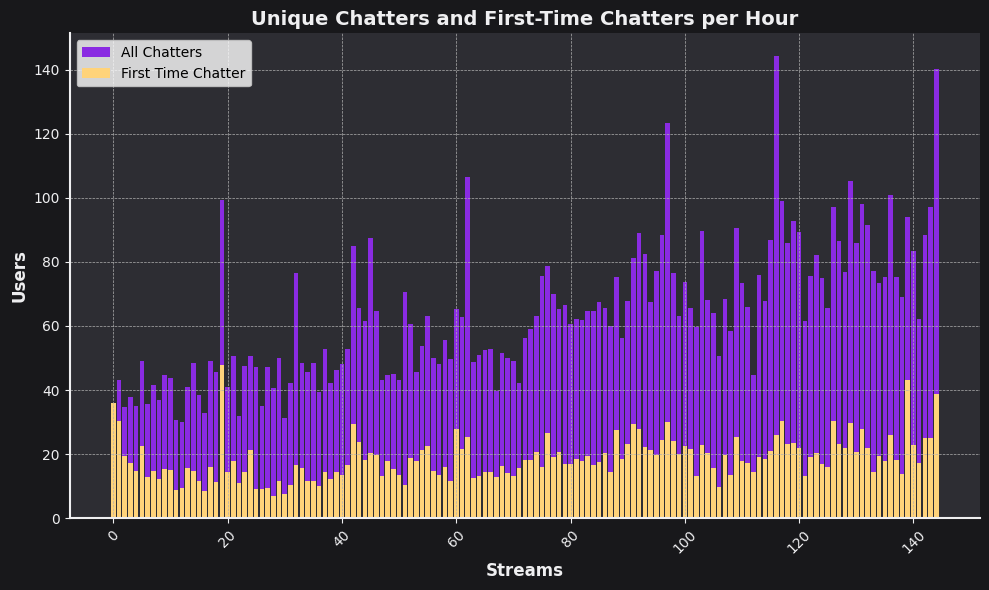

In [19]:
# Plot the bars with specified colors
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Bar plot for all chatters
ax.bar(stream_stats.index, 
       stream_stats['unique_chatters_per_hour'], 
       label='All Chatters', 
       color='#8A2BE2',  # Custom color for the first set of bars (purple)
       alpha=1           # Transparency
      )

# Bar plot for first-time chatters (stacked on top)
ax.bar(stream_stats.index, 
       stream_stats['stream_length_per_firt'], 
       label='First Time Chatter', 
       color='#FFD37A',  # Custom color for the second set of bars (yellow)
       alpha=1           # Transparency
      )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('Users', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('Unique Chatters and First-Time Chatters per Hour', fontsize=14, fontweight='bold', color=label_color)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Adding legend to differentiate the bars
ax.legend()

# Rotating x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Adding grid with custom style
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


In [20]:
# Path to your Excel file
file_path = 'DorozeaStreamStats.xlsx'

# Reading a specific sheet with custom column names and skipping the first two rows
exelStats = pd.read_excel(file_path, sheet_name='Munkalap1', header=None, names=['stream', 'avg', 'max','follow','games'], skiprows=1)


In [21]:
stream_stats = pd.merge(stream_stats, exelStats, on='stream', how='right')


In [22]:
#user with only 1 messege

# 1. Group by stream and user, and count the number of messages per user in each stream
user_message_counts = data.groupby(['stream', 'user']).size().reset_index(name='message_count')

# 2. Filter to keep only users who sent exactly one message in a stream
one_message_users = user_message_counts[user_message_counts['message_count'] == 1]

# 3. Count the number of such users for each stream
one_message_user_counts = one_message_users.groupby('stream').size().reset_index(name='one_message_user_count')

# 4. Merge this new information into the stream_stats dataframe
stream_stats = stream_stats.merge(one_message_user_counts, on='stream', how='left')

In [23]:
#2 or more messeges
stream_stats['two_or_more_message_user_counts'] = stream_stats['unique_chatters'] - stream_stats['one_message_user_count']

In [24]:
#message per chater
stream_stats['message_per_chater'] = stream_stats['total_messages'] / stream_stats['unique_chatters']

In [25]:
#hours watched
stream_stats['hours_watched'] = stream_stats['stream_length_hour'] * stream_stats['avg']

In [26]:
#total words count

# 1. Calculate the word count for each message
data['word_count'] = data['message'].apply(lambda x: len(x.split()))

# 2. Sum the word counts for each stream
stream_word_counts = data.groupby('stream')['word_count'].sum().reset_index(name='total_word_count')

# 3. Merge this new information into the stream_stats dataframe
stream_stats = stream_stats.merge(stream_word_counts, on='stream', how='left')

# If there are streams without any messages, fill NaN with 0
stream_stats['total_word_count'] = stream_stats['total_word_count'].fillna(0).astype(int)

In [27]:
#messege/min
stream_stats['message_per_min'] = stream_stats['total_messages'] / stream_stats['stream_length_hour'] / 60


In [28]:
#No stream elements
dataNoBots = data[data['user'] != 'StreamElements']
dataNoBots = dataNoBots[dataNoBots['user'] != 'Fossabot']

In [29]:
# 1. Count the number of messages per user in each stream
user_message_counts = dataNoBots.groupby(['stream', 'user']).size().reset_index(name='message_count')

# 2. Find the top 5 users for each stream
top_5_users = user_message_counts.groupby('stream').apply(
    lambda x: x.nlargest(5, 'message_count')['user'].tolist()
).reset_index(name='top_5_users')

# Convert the list to a comma-separated string for easier viewing
top_5_users['top_5_users'] = top_5_users['top_5_users'].apply(lambda x: ', '.join(x))

# 3. Merge this information into the stream_stats dataframe
stream_stats = stream_stats.merge(top_5_users[['stream', 'top_5_users']], on='stream', how='left')


C:\Users\Kardo\AppData\Local\Temp\ipykernel_21376\2347536326.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_users = user_message_counts.groupby('stream').apply(


In [30]:
stream_stats['top_5_users'].tail(1)

144    riesenklotz, giorgoslep, PINHAjoga, balintboss...
Name: top_5_users, dtype: object

In [31]:
#top 5 word in chat


# Define the list of words to exclude
stop_words = {'the',
                'a',
                'is',
                'to',
                'and',
                'i',
                'you',
                'in',
                'it',
                'u',
                'for',
                ']',
                'so',
                'on',
                'my',
                'are',
                'of',
                'this',
                'they',
                '/',
                'like',
                'have',
                'that',
                'its',
                '?',
                '!',
                'but',
                #maybe not
                'just',
                'was',
                'what',
                'your',
                'can',
                'not',
                'if',
                'she',
                'him',
                'we',
                'they',
                'at',
                'from',
                'by',
                'be',
                'he',
                'do'
                }

# 1. Tokenize messages by splitting them into words
#data['words'] = data['message'].apply(lambda x: x.split())

# Tokenize messages, splitting into words and filtering out stop words
dataNoBots = dataNoBots.copy()
dataNoBots['words'] = dataNoBots['message'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])


# 2. Aggregate all words per stream
stream_words = dataNoBots.groupby('stream')['words'].sum().reset_index()

# 3. Calculate the top 5 most common words for each stream
stream_words['top_5_words'] = stream_words['words'].apply(lambda x: [word for word, count in Counter(x).most_common(5)])

# Convert list to a comma-separated string for easier viewing
stream_words['top_5_words'] = stream_words['top_5_words'].apply(lambda x: ', '.join(x))

# 4. Merge this information into the stream_stats dataframe
stream_stats = stream_stats.merge(stream_words[['stream', 'top_5_words']], on='stream', how='left')


In [32]:
stream_stats['top_5_words'].tail(1)

144    doro, LOL, no, dorozeaHey, LUL
Name: top_5_words, dtype: object

In [33]:
subData = data[data.apply(lambda row: row['user'].lower() in row['message'].lower(), axis=1)]
subData =  subData[~subData['message'].str.contains(' converted from ', case=False, na=False)]
giftedData = subData[subData['message'].str.contains(' sub ', case=False, na=False)]

unique_gifter = giftedData['user'].nunique()
print("Number of unique Gifter:", unique_gifter)

Number of unique Gifter: 146


In [ ]:
giftedData.head(10)

,date,user,message,stream,first_message,word_count
121,2024-05-01 15:14:43+00:00,yusuf2774,yusuf2774 gifted a Tier 1 sub to ChickenBurgah...,0,0,8
567,2024-05-01 16:29:11+00:00,x3lolx,x3lolx gifted a Tier 1 sub to ArtMassong!,0,0,8
569,2024-05-01 16:30:00+00:00,x3lolx,x3lolx gifted a Tier 1 sub to PrachtkerleDE!,0,0,8
576,2024-05-01 16:31:10+00:00,x3lolx,x3lolx gifted a Tier 1 sub to lubb1x!,0,0,8
661,2024-05-01 16:41:16+00:00,x3lolx,x3lolx gifted a Tier 1 sub to alaskalyeska!,0,0,8
1076,2024-05-01 17:54:29+00:00,Bizzan,Bizzan gifted a Tier 1 sub to shotashellz!,0,0,8
1077,2024-05-01 17:54:29+00:00,Bizzan,Bizzan gifted a Tier 1 sub to aabeemick!,0,0,8
1078,2024-05-01 17:54:29+00:00,Bizzan,Bizzan gifted a Tier 1 sub to gantl4!,0,0,8
1079,2024-05-01 17:54:29+00:00,Bizzan,Bizzan gifted a Tier 1 sub to Minaqua__!,0,0,8
1080,2024-05-01 17:54:29+00:00,Bizzan,Bizzan gifted a Tier 1 sub to FeiFuchs!,0,0,8


In [35]:
gifterData = subData[subData['message'].str.contains(' is gifting ', case=False, na=False)].copy()
gifterData['gifts'] = gifterData['message'].apply(lambda x: int(re.search(r'gifting\s(\d+)', x).group(1)))

gift_per_stream_2 = gifterData.groupby('stream')['gifts'].sum()

stream_stats = pd.merge(stream_stats, gift_per_stream_2, on='stream', how='left')

stream_stats = stream_stats.rename(columns={'gifts': 'gift2'})
stream_stats['gift2'] = stream_stats['gift2'].fillna(0)

In [36]:
stream_stats['gift2'].head(5)

0    25.0
1    31.0
2     0.0
3     5.0
4     0.0
Name: gift2, dtype: float64

In [37]:
unique_users_per_stream = giftedData.groupby('stream')['user'].nunique()

stream_stats = pd.merge(stream_stats, unique_users_per_stream, on='stream', how='left')

stream_stats = stream_stats.rename(columns={'user': 'gifter'})
stream_stats['gifter'] = stream_stats['gifter'].fillna(0)

In [38]:
stream_stats['gifter'].describe()

count    145.000000
mean       1.758621
std        1.780589
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: gifter, dtype: float64

In [39]:
gift_per_stream = giftedData.groupby('stream')['user'].count()

stream_stats = pd.merge(stream_stats, gift_per_stream, on='stream', how='left')

stream_stats = stream_stats.rename(columns={'user': 'gift'})
stream_stats['gift'] = stream_stats['gift'].fillna(0)

In [40]:
stream_stats['gift'] = np.maximum(stream_stats['gift'], stream_stats['gift2'])

In [41]:
raids = subData[subData['message'].str.contains(' raiders from ', case=False, na=False)].copy()
raids['raid'] = raids['message'].str.split().str[0]
raids['raid'] = pd.to_numeric(raids['raid'], errors='raise')

raid_stream = raids.groupby('stream')['raid'].max()
stream_stats = pd.merge(stream_stats, raid_stream, on='stream', how='left')
stream_stats['raid'] = stream_stats['raid'].fillna(0)


stream_stats['raid'].head(5)

0      4.0
1    125.0
2      0.0
3      0.0
4      0.0
Name: raid, dtype: float64

In [42]:
stream_stats['raid'].tail(5)

140      0.0
141     84.0
142     82.0
143    939.0
144      0.0
Name: raid, dtype: float64

In [43]:
raids.sort_values(by='stream').tail(5)

,date,user,message,stream,first_message,word_count,raid
465135,2024-10-16 16:59:23+00:00,1206paul_,13 raiders from 1206paul_ have joined!,138,0,6,13
466588,2024-10-17 13:51:27+00:00,ZLOYn,1043 raiders from ZLOYn have joined!,139,0,6,1043
477470,2024-10-20 18:50:29+00:00,yxngstxr,84 raiders from yxngstxr have joined!,141,0,6,84
479533,2024-10-21 14:08:51+00:00,yxngstxr,82 raiders from yxngstxr have joined!,142,0,6,82
483259,2024-10-22 13:10:51+00:00,dima_wallhacks,939 raiders from dima_wallhacks have joined!,143,0,6,939


In [44]:
primeData = subData[subData['message'].str.contains('Prime', case=False, na=False)]

prime_per_stream = primeData.groupby('stream')['user'].count()

stream_stats = pd.merge(stream_stats, prime_per_stream, on='stream', how='left')
stream_stats = stream_stats.rename(columns={'user': 'prime'})
stream_stats['prime'] = stream_stats['prime'].fillna(0)

#stream_stats['prime'].describe()
stream_stats.head(5)


,stream,first_messages,total_messages,unique_chatters,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,first_messages_avg,unique_chatters_per_hour_avg,...,hours_watched,total_word_count,message_per_min,top_5_users,top_5_words,gift2,gifter,gift,raid,prime
0,0,177,1985,177,17697.0,4.915833,36.006103,36.006103,177.000000,36.006103,...,634.142500,10568,6.729954,"Martin_Gales, Banties1g, Jello_CS, 1206paul_, ...","1, doro, !play, with, good",25.0,4.0,25.0,4.0,2.0
1,1,150,3046,213,17831.0,4.953056,30.284336,43.003758,163.500000,39.504930,...,752.864444,14301,10.249565,"Martin_Gales, saykokerem, klimzaa, LX212, Bant...","sigma, doro, !play, mhm, with",31.0,4.0,31.0,125.0,1.0
2,2,104,2754,185,19147.0,5.318611,19.553977,34.783517,143.666667,37.931126,...,670.145000,13389,8.630073,"Banties1g, Martin_Gales, klimzaa, LX212, Wii_Gii","mhm, !play, omE, doro, good",0.0,0.0,0.0,0.0,2.0
3,3,84,2375,184,17451.0,4.847500,17.328520,37.957710,128.750000,37.937772,...,644.717500,10244,8.165721,"Martin_Gales, Banties1g, LX212, roxa0, zaxkyyy_","!play, mhm, doro, omE, LUL",5.0,2.0,6.0,0.0,1.0
4,4,76,2455,182,18734.0,5.203889,14.604462,34.973844,118.200000,37.344986,...,770.175556,11883,7.862710,"Martin_Gales, klimzaa, x3lolx, ylb_cat_soul22,...","mhm, doro, with, good, O?",0.0,0.0,0.0,0.0,2.0


In [45]:
trueSub =  subData[~ subData['message'].str.contains('Prime', case=False, na=False)]

trueSub = trueSub[~trueSub['message'].str.contains('raiders', case=False, na=False)]

trueSub = trueSub[~trueSub['message'].str.contains('gifting', case=False, na=False)]

trueSub = trueSub[~trueSub['message'].str.contains('gifted', case=False, na=False)]

trueSub = trueSub[trueSub['message'].str.contains(' subscribed at ', case=False, na=False)]



tier1 = trueSub[trueSub['message'].str.contains('Tier 1', case=False, na=False)]
tier2 = trueSub[trueSub['message'].str.contains('Tier 2', case=False, na=False)]
tier3 = trueSub[trueSub['message'].str.contains('Tier 3', case=False, na=False)]

tier1_per_stream = tier1.groupby('stream')['user'].count()
stream_stats = pd.merge(stream_stats, tier1_per_stream, on='stream', how='left')
stream_stats = stream_stats.rename(columns={'user': 'tier1'})
stream_stats['tier1'] = stream_stats['tier1'].fillna(0)

tier2_per_stream = tier2.groupby('stream')['user'].count()
stream_stats = pd.merge(stream_stats, tier2_per_stream, on='stream', how='left')
stream_stats = stream_stats.rename(columns={'user': 'tier2'})
stream_stats['tier2'] = stream_stats['tier2'].fillna(0)

tier3_per_stream = tier3.groupby('stream')['user'].count()
stream_stats = pd.merge(stream_stats, tier3_per_stream, on='stream', how='left')
stream_stats = stream_stats.rename(columns={'user': 'tier3'})
stream_stats['tier3'] = stream_stats['tier3'].fillna(0)


In [46]:
no_raid = stream_stats[stream_stats['raid']==0][['stream','avg', 'max']].copy()

In [47]:
no_raid.head(5)

,stream,avg,max
2,2,126,161
3,3,133,169
4,4,148,177
5,5,187,252
6,6,127,157


In [48]:

no_raid['per'] = (no_raid['max'] / no_raid['avg']) *100

correct_per = no_raid['per'].mean

In [49]:
stream_stats['avg_rolling'] = stream_stats['avg'].rolling(window=10).mean()

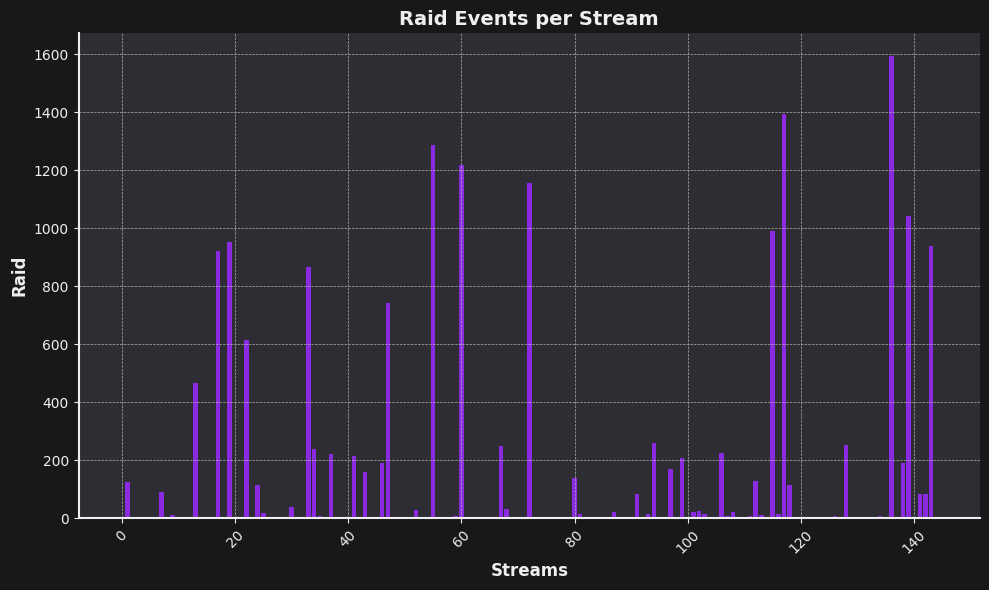

In [50]:
# Plot the bar chart with custom styling
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Bar plot for raid
ax.bar(stream_stats.index, 
       stream_stats['raid'], 
       color='#8A2BE2',  # Custom color for bars (purple)
       alpha=1           # Transparency
      )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('Raid', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('Raid Events per Stream', fontsize=14, fontweight='bold', color=label_color)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Rotating x-axis labels
plt.xticks(rotation=45, fontsize=10, color=label_color)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Adding grid with custom style
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


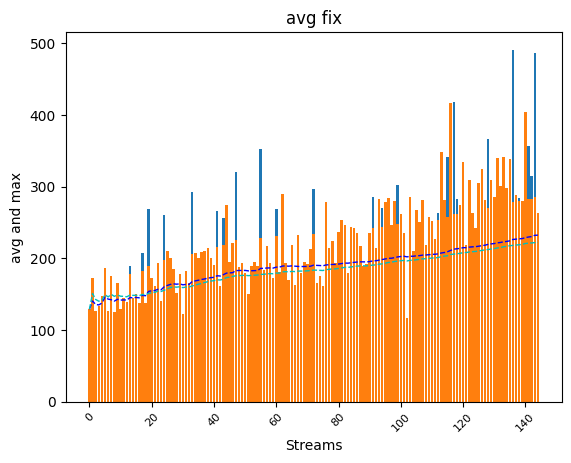

In [51]:
#fix

stream_stats['expanding_avg'] = stream_stats['avg'].expanding().mean()

stream_stats['avg_fix'] = stream_stats.apply(
    lambda row: row['expanding_avg'] * 1.23 if row['raid'] >= 50 else row['avg'], axis=1
)

fig, ax = plt.subplots()

ax.bar(stream_stats.index, stream_stats['avg'])

ax.bar(stream_stats.index, stream_stats['avg_fix'])

stream_stats['expanding_avg_fix'] = stream_stats['avg_fix'].expanding().mean()

ax.plot(index, stream_stats['expanding_avg'], color='b', linestyle='--', linewidth=1, label='Running Mean')
ax.plot(index, stream_stats['expanding_avg_fix'], color='c', linestyle='--', linewidth=1, label='Running Mean')

ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('avg and max', fontsize=10)
ax.set_title('avg fix', fontsize=12)

plt.xticks(rotation=45, fontsize=8)
plt.show()

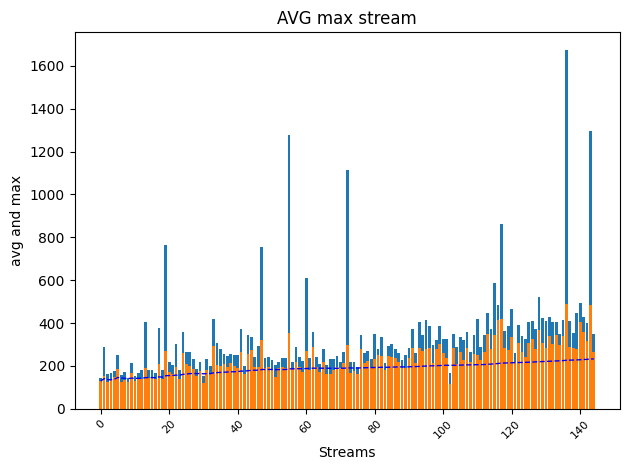

In [52]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for max viever
ax.bar(stream_stats.index, stream_stats['max'])

# Bar plot for abg viever
ax.bar(stream_stats.index, stream_stats['avg'])

stream_stats['epanding_avg'] = stream_stats['avg'].expanding().mean()
# Plot the running mean line
ax.plot(index, stream_stats['epanding_avg'], color='b', linestyle='--', linewidth=1, label='Running Mean')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('avg and max', fontsize=10)
ax.set_title('AVG max stream', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

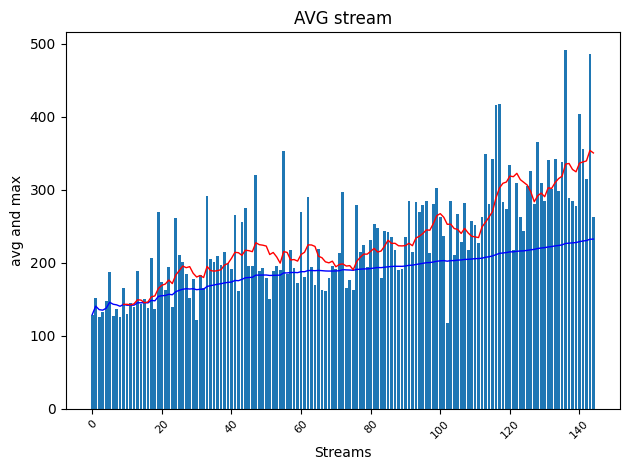

In [53]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for abg viever
ax.bar(stream_stats.index, stream_stats['avg'])

# Plot the running mean line
ax.plot(index, stream_stats['epanding_avg'], color='b', linestyle='-', linewidth=1, label='Running Mean')

# Plot the running mean line
ax.plot(index, stream_stats['avg_rolling'], color='r', linestyle='-', linewidth=1, label='Running Mean')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('avg and max', fontsize=10)
ax.set_title('AVG stream', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

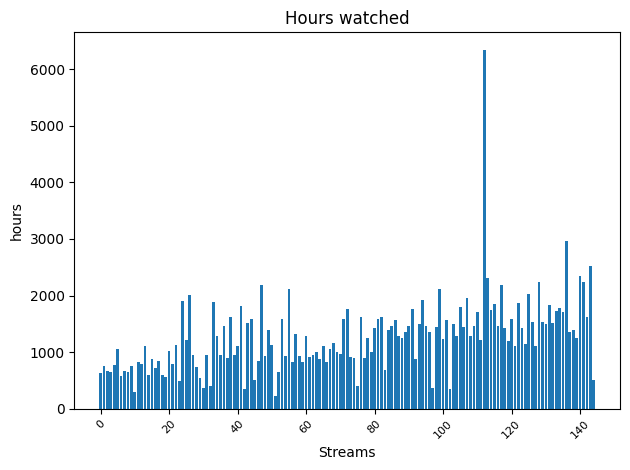

In [54]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for abg viever
ax.bar(stream_stats.index, stream_stats['hours_watched'])

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('hours', fontsize=10)
ax.set_title('Hours watched', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [55]:
stream_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   stream                           145 non-null    int64  
 1   first_messages                   145 non-null    int64  
 2   total_messages                   145 non-null    int64  
 3   unique_chatters                  145 non-null    int64  
 4   stream_length                    145 non-null    float64
 5   stream_length_hour               145 non-null    float64
 6   stream_length_per_firt           145 non-null    float64
 7   unique_chatters_per_hour         145 non-null    float64
 8   first_messages_avg               145 non-null    float64
 9   unique_chatters_per_hour_avg     145 non-null    float64
 10  users                            145 non-null    object 
 11  returning_users                  145 non-null    object 
 12  returning_count       

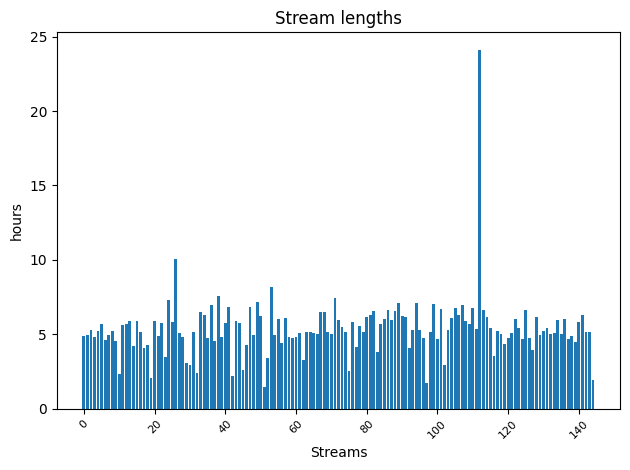

In [56]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for abg viever
ax.bar(stream_stats.index, stream_stats['stream_length_hour'])

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('hours', fontsize=10)
ax.set_title('Stream lengths', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [57]:

stream_stats.head(2)

,stream,first_messages,total_messages,unique_chatters,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,first_messages_avg,unique_chatters_per_hour_avg,...,raid,prime,tier1,tier2,tier3,avg_rolling,expanding_avg,avg_fix,expanding_avg_fix,epanding_avg
0,0,177,1985,177,17697.0,4.915833,36.006103,36.006103,177.0,36.006103,...,4.0,2.0,3.0,0.0,0.0,NaN,129.0,129.000,129.0000,129.0
1,1,150,3046,213,17831.0,4.953056,30.284336,43.003758,163.5,39.504930,...,125.0,1.0,1.0,0.0,0.0,NaN,140.5,172.815,150.9075,140.5


In [58]:
stream_stats.tail(2)

,stream,first_messages,total_messages,unique_chatters,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,first_messages_avg,unique_chatters_per_hour_avg,...,raid,prime,tier1,tier2,tier3,avg_rolling,expanding_avg,avg_fix,expanding_avg_fix,epanding_avg
143,143,129,4918,503,18655.0,5.181944,24.894130,97.067810,98.173611,63.059052,...,939.0,3.0,9.0,0.0,0.0,353.8,232.111111,285.496667,222.04180,232.111111
144,144,75,1579,271,6956.0,1.932222,38.815411,140.253019,98.013793,63.591425,...,0.0,1.0,4.0,0.0,1.0,350.3,232.324138,263.000000,222.32427,232.324138


In [59]:
#stream_stats.to_csv('combined_output.csv', index=False)

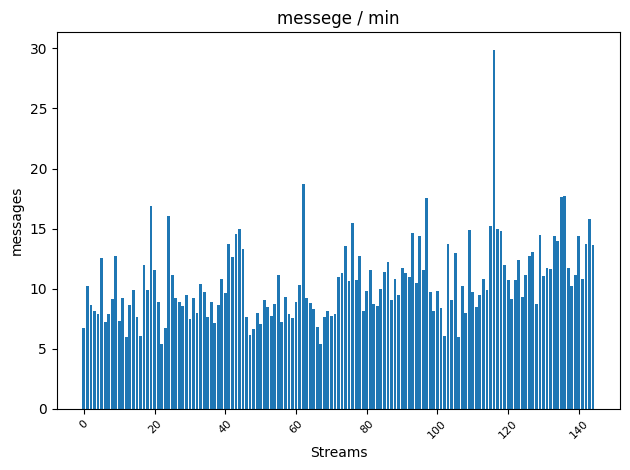

In [60]:
# Plot the chart
fig, ax = plt.subplots()

# Bar plot for max viever
ax.bar(stream_stats.index, stream_stats['message_per_min'])

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('messages', fontsize=10)
ax.set_title('messege / min', fontsize=12)

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

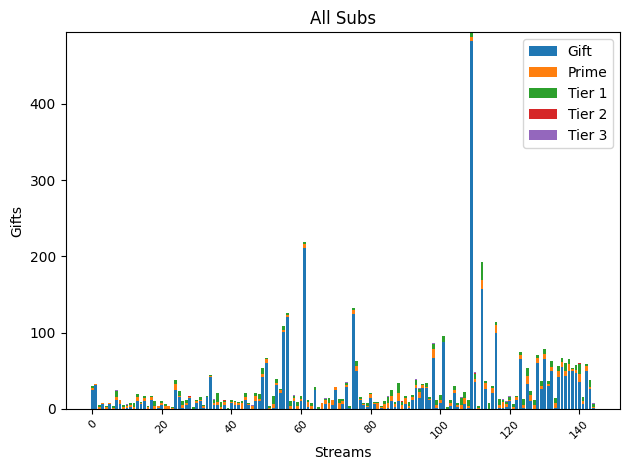

In [61]:
import matplotlib.pyplot as plt

# Plot the chart
fig, ax = plt.subplots()

# Stacked bar plot
ax.bar(stream_stats.index, stream_stats['gift'], label='Gift')
ax.bar(stream_stats.index, stream_stats['prime'], bottom=stream_stats['gift'], label='Prime')
ax.bar(stream_stats.index, stream_stats['tier1'], bottom=stream_stats['gift'] + stream_stats['prime'], label='Tier 1')
ax.bar(stream_stats.index, stream_stats['tier2'], bottom=stream_stats['gift'] + stream_stats['prime'] + stream_stats['tier1'], label='Tier 2')
ax.bar(stream_stats.index, stream_stats['tier3'], bottom=stream_stats['gift'] + stream_stats['prime'] + stream_stats['tier1'] + stream_stats['tier2'], label='Tier 3')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('Gifts', fontsize=10)
ax.set_title('All Subs', fontsize=12)

# Adding legend to differentiate the bars
ax.legend()

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()


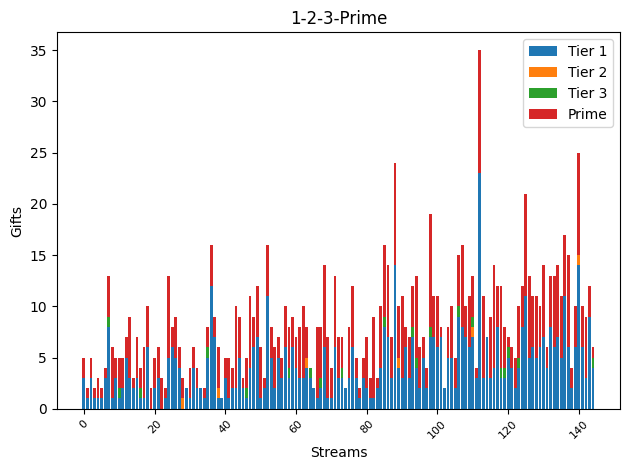

In [62]:
# Plot the chart
fig, ax = plt.subplots()

# Stacked bar plot
ax.bar(stream_stats.index, stream_stats['tier1'], label='Tier 1')
ax.bar(stream_stats.index, stream_stats['tier2'], bottom=stream_stats['tier1'], label='Tier 2')
ax.bar(stream_stats.index, stream_stats['tier3'], bottom=stream_stats['tier1'] + stream_stats['tier2'], label='Tier 3')
ax.bar(stream_stats.index, stream_stats['prime'], bottom=stream_stats['tier1'] + stream_stats['tier2'] + stream_stats['tier3'], label='Prime')

# Labels and title
ax.set_xlabel('Streams', fontsize=10)
ax.set_ylabel('Gifts', fontsize=10)
ax.set_title('1-2-3-Prime', fontsize=12)

# Adding legend to differentiate the bars
ax.legend()

# Display the plot
plt.xticks(rotation=45, fontsize=8)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()


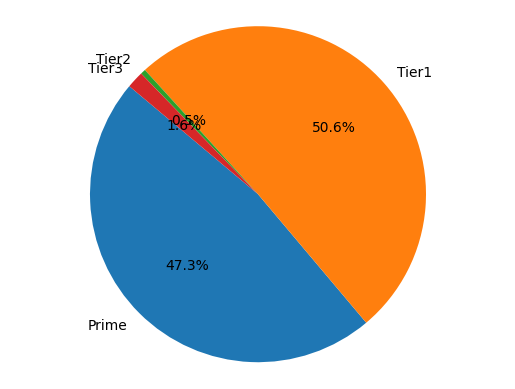

In [63]:
# Data to plot
labels = ['Prime', 'Tier1', 'Tier2', 'Tier3']
sizes = [primeData.shape[0], tier1.shape[0], tier2.shape[0], tier3.shape[0]]

sizes

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Show the pie chart
plt.show()


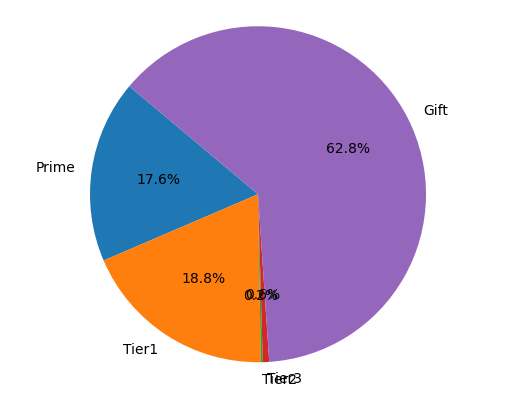

In [64]:
# Data to plot
labels = ['Prime', 'Tier1', 'Tier2', 'Tier3','Gift']
sizes = [primeData.shape[0], tier1.shape[0], tier2.shape[0], tier3.shape[0],giftedData.shape[0]]

sizes

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Show the pie chart
plt.show()


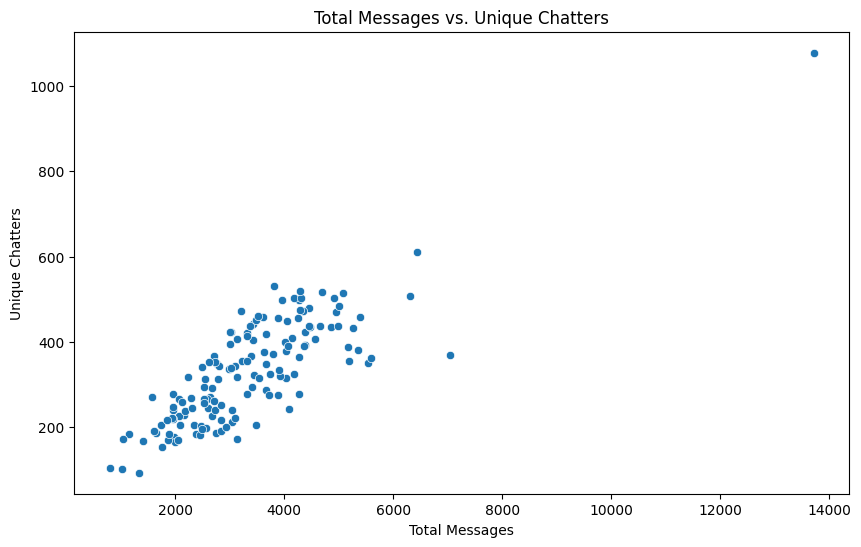

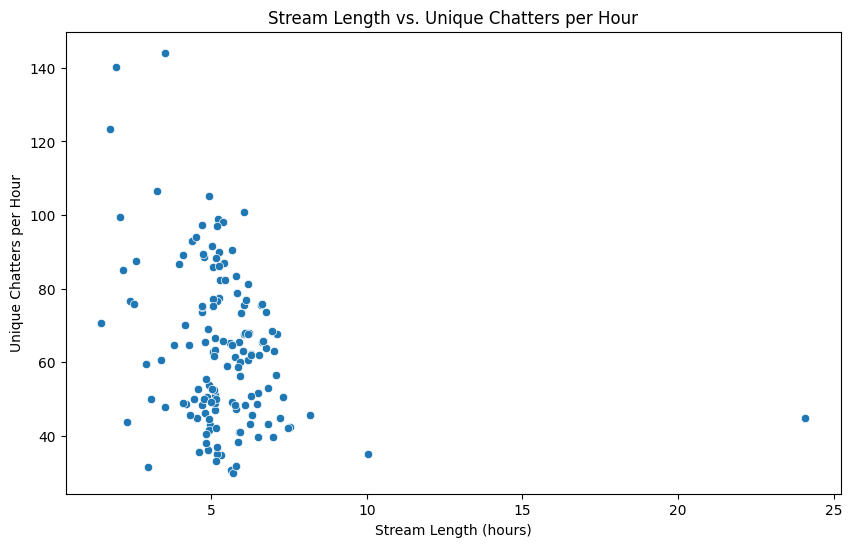

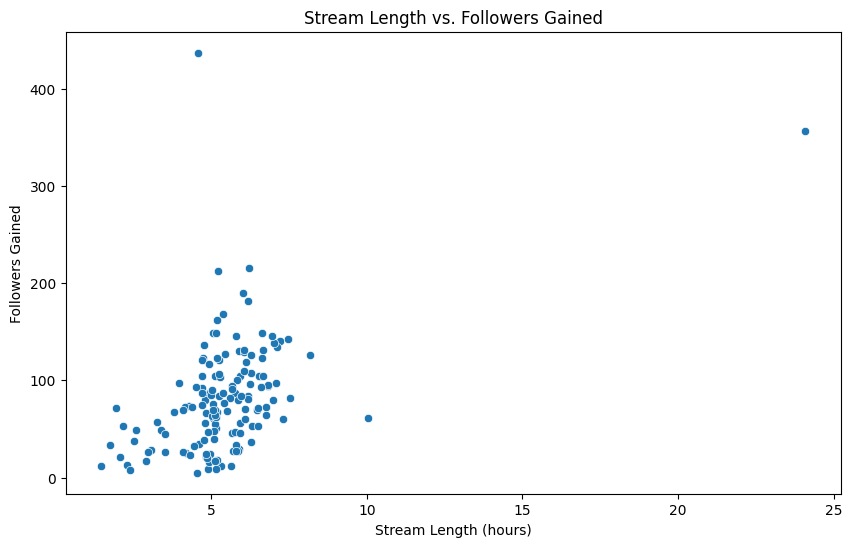

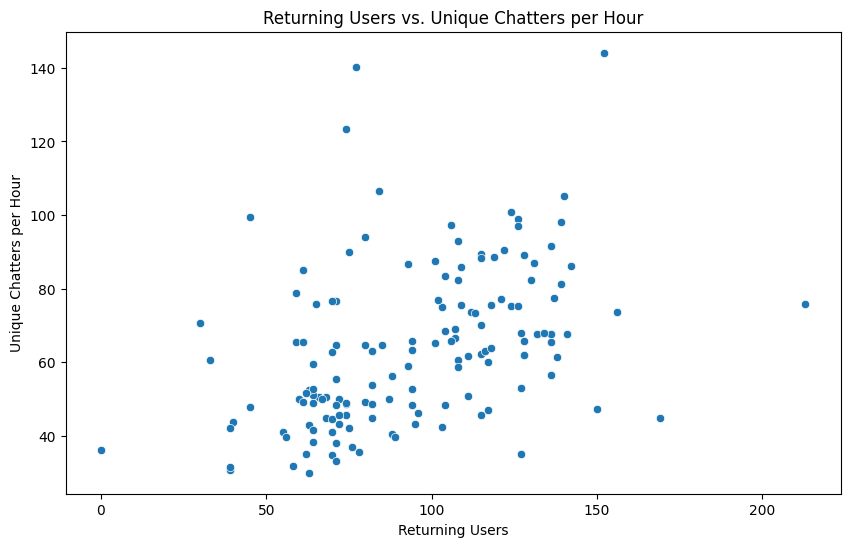

In [65]:

# Scatter plot for Total Messages vs. Unique Chatters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stream_stats['total_messages'], y=stream_stats['unique_chatters'])
plt.title('Total Messages vs. Unique Chatters')
plt.xlabel('Total Messages')
plt.ylabel('Unique Chatters')
plt.show()

# Scatter plot for Stream Length vs. Unique Chatters per Hour
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stream_stats['stream_length_hour'], y=stream_stats['unique_chatters_per_hour'])
plt.title('Stream Length vs. Unique Chatters per Hour')
plt.xlabel('Stream Length (hours)')
plt.ylabel('Unique Chatters per Hour')
plt.show()

# Scatter plot for Stream Length vs. Followers Gained
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stream_stats['stream_length_hour'], y=stream_stats['follow'])
plt.title('Stream Length vs. Followers Gained')
plt.xlabel('Stream Length (hours)')
plt.ylabel('Followers Gained')
plt.show()

# Scatter plot for Returning Users vs. Unique Chatters per Hour
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stream_stats['returning_count'], y=stream_stats['unique_chatters_per_hour'])
plt.title('Returning Users vs. Unique Chatters per Hour')
plt.xlabel('Returning Users')
plt.ylabel('Unique Chatters per Hour')
plt.show()

In [66]:
# Split the 'games' column into lists
stream_stats['games_list'] = stream_stats['games'].str.split(', ')

# Get the unique games across all streams
unique_games = set(sum(stream_stats['games_list'].tolist(), []))- {''}

# Create a column for each unique game
for game in unique_games:
    stream_stats[game] = stream_stats['games_list'].apply(lambda x: 1 if game in x else 0)

# Drop the temporary 'games_list' column
stream_stats.drop(columns=['games_list'], inplace=True)


In [67]:
stream_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   stream                           145 non-null    int64  
 1   first_messages                   145 non-null    int64  
 2   total_messages                   145 non-null    int64  
 3   unique_chatters                  145 non-null    int64  
 4   stream_length                    145 non-null    float64
 5   stream_length_hour               145 non-null    float64
 6   stream_length_per_firt           145 non-null    float64
 7   unique_chatters_per_hour         145 non-null    float64
 8   first_messages_avg               145 non-null    float64
 9   unique_chatters_per_hour_avg     145 non-null    float64
 10  users                            145 non-null    object 
 11  returning_users                  145 non-null    object 
 12  returning_count       

In [68]:
unique_games

{'chainedtogether',
 'codbo6',
 'crab',
 'cs',
 'deadatnigth',
 'deadlock',
 'demonologist',
 'detroid',
 'er',
 'fnf',
 'fortnite',
 'irl',
 'jc',
 'letalcomp',
 'lol',
 'marbels',
 'mc',
 'ow2',
 'parasocial',
 'phazmo',
 'pubg',
 'rdr2',
 're2',
 're3',
 're4',
 're5',
 'roblox',
 'sl2',
 'special',
 'tf2',
 'valo'}

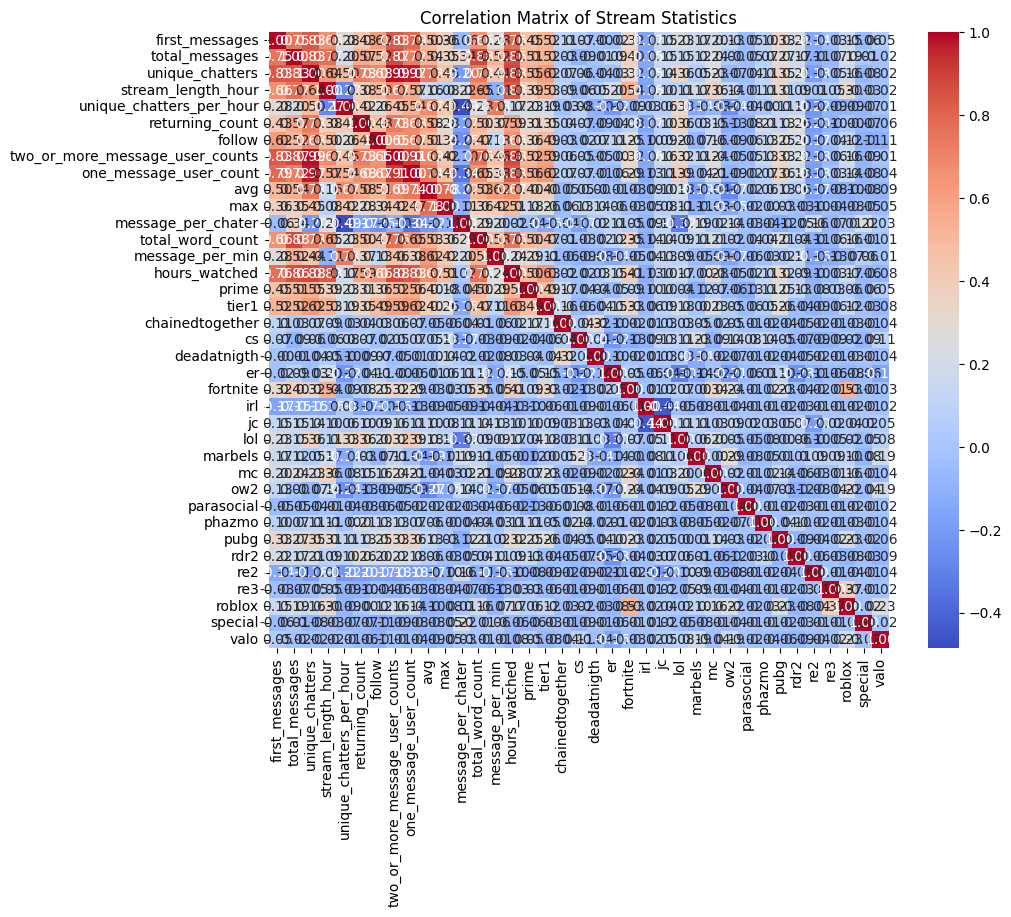

In [69]:
# Correlation matrix for selected columns
correlation_matrix = stream_stats[[ 'first_messages',
                                    'total_messages',
                                    'unique_chatters',
                                    'stream_length_hour',
                                    'unique_chatters_per_hour',
                                    'returning_count',
                                    'follow',
                                    'two_or_more_message_user_counts',
                                    'one_message_user_count',
                                    'avg',
                                    'max',
                                    'message_per_chater',
                                    'total_word_count',
                                    'message_per_min',
                                    'hours_watched',
                                    'prime',
                                    'tier1',
                                    'chainedtogether',
                                    'cs',
                                    'deadatnigth',
                                    'er',
                                    'fortnite',
                                    'irl',
                                    'jc',
                                    'lol',
                                    'marbels',
                                    'mc',
                                    'ow2',
                                    'parasocial',
                                    'phazmo',
                                    'pubg',
                                    'rdr2',
                                    're2',
                                    're3',
                                    'roblox',
                                    'special',
                                    'valo'
                                    ]].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stream Statistics')
plt.show()

In [70]:
#stream_stats.to_csv('combined_output.csv', index=False)

In [71]:
# Define game columns
game_columns = unique_games

# Initialize a dictionary to hold aggregated data
game_impact_data = {}

# Aggregate metrics for each game
for game in game_columns:
    # Filter the dataset for streams where the specific game was played
    game_data = stream_stats[stream_stats[game] == 1]
    
    # Calculate average metrics for the filtered data
    average_metrics = {
        'Average Total Messages': game_data['total_messages'].mean(),
        'Average Unique Chatters': game_data['unique_chatters'].mean(),
        'Average Hours Watched': game_data['hours_watched'].mean(),
        'Average Total Word Count': game_data['total_word_count'].mean(),
        'Average Returning User Count': game_data['returning_count_avg'].mean(),
        'Average Viewer Count': game_data['avg'].mean(),
        'Max Viewer Count': game_data['max'].mean()
    }
    
    # Store the averages in the dictionary
    game_impact_data[game] = average_metrics

# Convert the dictionary to a DataFrame for better visualization
game_impact_df = pd.DataFrame(game_impact_data).T
game_impact_df.reset_index(inplace=True)
game_impact_df.columns = ['Game', 'Average Total Messages', 'Average Unique Chatters', 
                          'Average Hours Watched', 'Average Total Word Count', 
                          'Average Returning User Count','Average Viewer Count',
                          'Max Viewer Count']



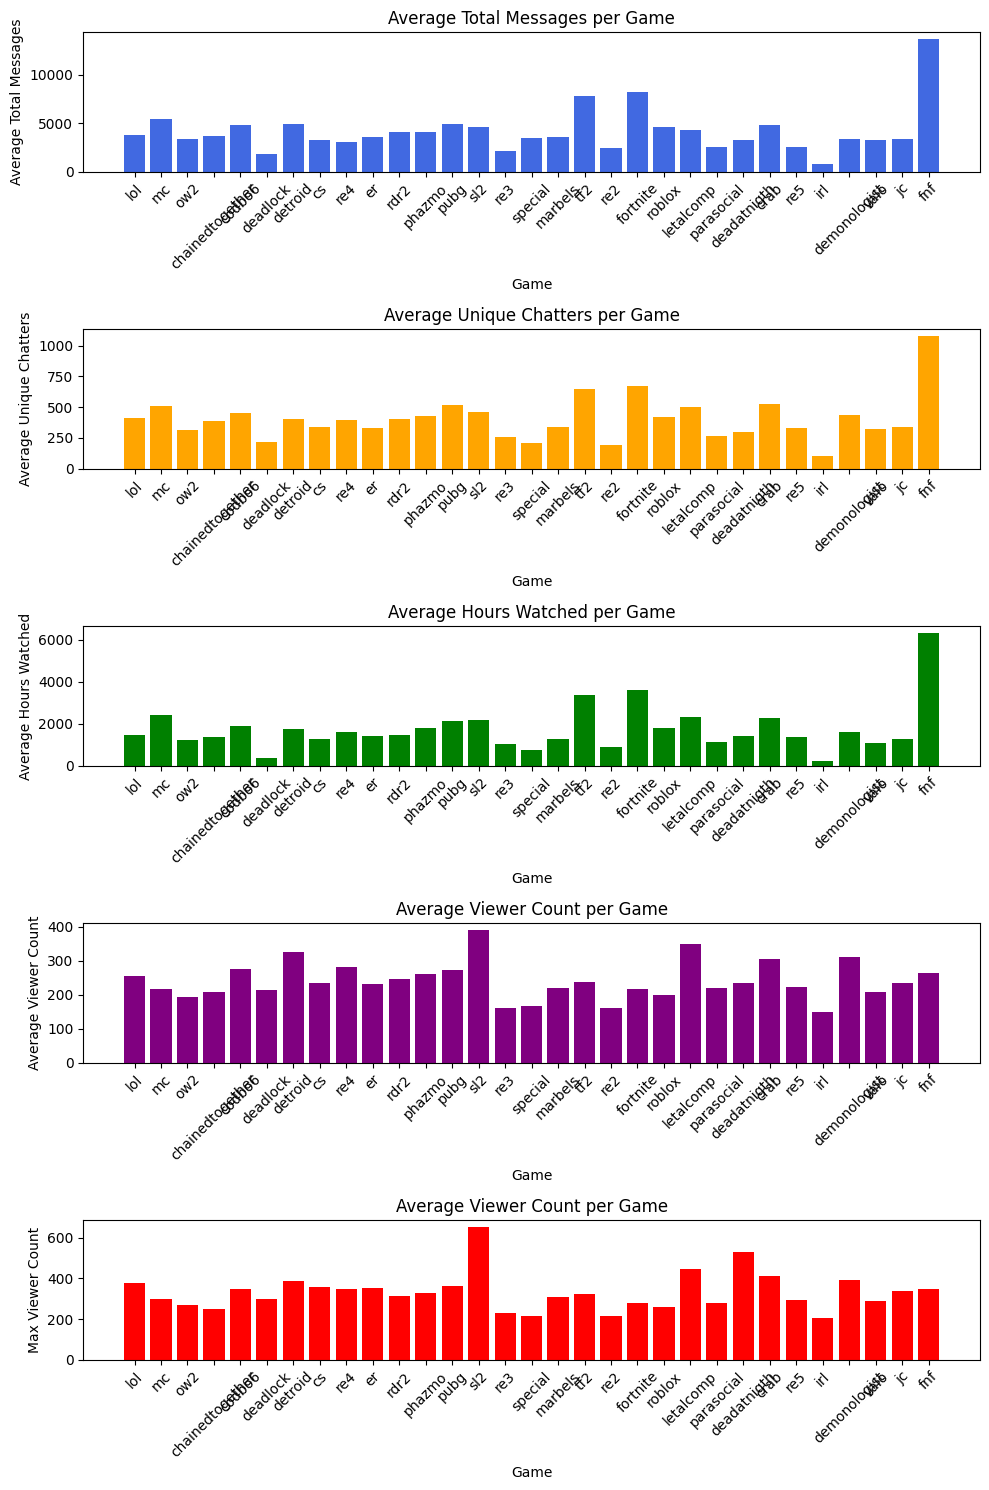

In [72]:
# Set up the figure and axes for subplots
fig, ax = plt.subplots(5, 1, figsize=(10, 15))

# Bar chart for Average Total Messages
ax[0].bar(game_impact_df['Game'], game_impact_df['Average Total Messages'], color='royalblue')
ax[0].set_title('Average Total Messages per Game')
ax[0].set_xlabel('Game')
ax[0].set_ylabel('Average Total Messages')
ax[0].tick_params(axis='x', rotation=45)

# Bar chart for Average Unique Chatters
ax[1].bar(game_impact_df['Game'], game_impact_df['Average Unique Chatters'], color='orange')
ax[1].set_title('Average Unique Chatters per Game')
ax[1].set_xlabel('Game')
ax[1].set_ylabel('Average Unique Chatters')
ax[1].tick_params(axis='x', rotation=45)

# Bar chart for Average Hours Watched
ax[2].bar(game_impact_df['Game'], game_impact_df['Average Hours Watched'], color='green')
ax[2].set_title('Average Hours Watched per Game')
ax[2].set_xlabel('Game')
ax[2].set_ylabel('Average Hours Watched')
ax[2].tick_params(axis='x', rotation=45)

# Bar chart for Average Hours Watched
ax[3].bar(game_impact_df['Game'], game_impact_df['Average Viewer Count'], color='purple')
ax[3].set_title('Average Viewer Count per Game')
ax[3].set_xlabel('Game')
ax[3].set_ylabel('Average Viewer Count')
ax[3].tick_params(axis='x', rotation=45)

# Bar chart for Average Hours Watched
ax[4].bar(game_impact_df['Game'], game_impact_df['Max Viewer Count'], color='red')
ax[4].set_title('Average Viewer Count per Game')
ax[4].set_xlabel('Game')
ax[4].set_ylabel('Max Viewer Count')
ax[4].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [73]:
# Extract only the date (without time)
data['date_only'] = data['date'].dt.date

# Group by 'stream' and find the first message date
stream_date = data.groupby('stream')['date_only'].min().reset_index()

# Rename the columns appropriately
stream_date.columns = ['stream', 'stream_date']

# Assuming stream_stats is the existing DataFrame you want to update
# Merge the stream_date with the stream_stats DataFrame
stream_stats = stream_stats.merge(stream_date, on='stream', how='left')

# Now, stream_stats will have a new column 'stream_date' with the date of the first message for each stream.


In [74]:
stream_stats['stream_date'].tail(5)

140    2024-10-19
141    2024-10-20
142    2024-10-21
143    2024-10-22
144    2024-10-23
Name: stream_date, dtype: object

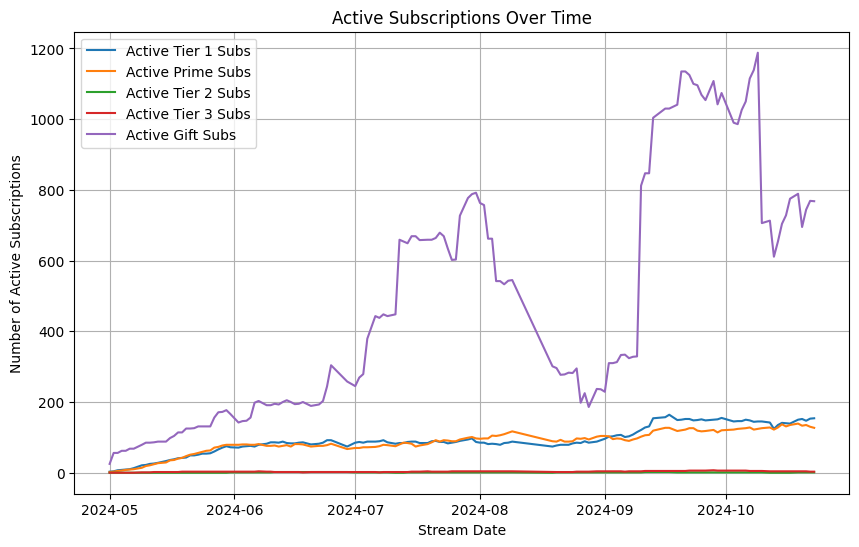

In [75]:
# Convert stream_date to datetime if it is not already
stream_stats['stream_date'] = pd.to_datetime(stream_stats['stream_date'])

# Tier1
active_subs = []

for i in range(len(stream_stats)):
    current_date = stream_stats.iloc[i]['stream_date']
    
    mask = (stream_stats['stream_date'] <= current_date) & \
           (stream_stats['stream_date'] > current_date - pd.Timedelta(days=30))
    active_sub_count = stream_stats.loc[mask, 'tier1'].sum()
    
    active_subs.append(active_sub_count)
stream_stats['active_subs'] = active_subs

# PRIME
active_prime = []

for i in range(len(stream_stats)):
    current_date = stream_stats.iloc[i]['stream_date']
    
    mask = (stream_stats['stream_date'] <= current_date) & \
           (stream_stats['stream_date'] > current_date - pd.Timedelta(days=30))
    active_prime_count = stream_stats.loc[mask, 'prime'].sum()
    
    active_prime.append(active_prime_count)
stream_stats['active_prime'] = active_prime

# Tier2
active_tier2 = []

for i in range(len(stream_stats)):
    current_date = stream_stats.iloc[i]['stream_date']
    
    mask = (stream_stats['stream_date'] <= current_date) & \
           (stream_stats['stream_date'] > current_date - pd.Timedelta(days=30))
    active_tier2_count = stream_stats.loc[mask, 'tier2'].sum()
    
    active_tier2.append(active_tier2_count)
stream_stats['active_tier2'] = active_tier2

# Tier3
active_tier3 = []

for i in range(len(stream_stats)):
    current_date = stream_stats.iloc[i]['stream_date']
    
    mask = (stream_stats['stream_date'] <= current_date) & \
           (stream_stats['stream_date'] > current_date - pd.Timedelta(days=30))
    active_tier3_count = stream_stats.loc[mask, 'tier3'].sum()
    
    active_tier3.append(active_tier3_count)
stream_stats['active_tier3'] = active_tier3

# Tier3
active_gift = []

for i in range(len(stream_stats)):
    current_date = stream_stats.iloc[i]['stream_date']
    
    mask = (stream_stats['stream_date'] <= current_date) & \
           (stream_stats['stream_date'] > current_date - pd.Timedelta(days=30))
    active_gift_count = stream_stats.loc[mask, 'gift'].sum()
    
    active_gift.append(active_gift_count)
stream_stats['active_gift'] = active_gift

# Plot the data
plt.figure(figsize=(10, 6))

# Plot each subscription type with labels
plt.plot(stream_stats['stream_date'], stream_stats['active_subs'], label='Active Tier 1 Subs')
plt.plot(stream_stats['stream_date'], stream_stats['active_prime'], label='Active Prime Subs')
plt.plot(stream_stats['stream_date'], stream_stats['active_tier2'], label='Active Tier 2 Subs')
plt.plot(stream_stats['stream_date'], stream_stats['active_tier3'], label='Active Tier 3 Subs')
plt.plot(stream_stats['stream_date'], stream_stats['active_gift'], label='Active Gift Subs')

# Add title and labels
plt.title('Active Subscriptions Over Time')
plt.xlabel('Stream Date')
plt.ylabel('Number of Active Subscriptions')

# Display grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

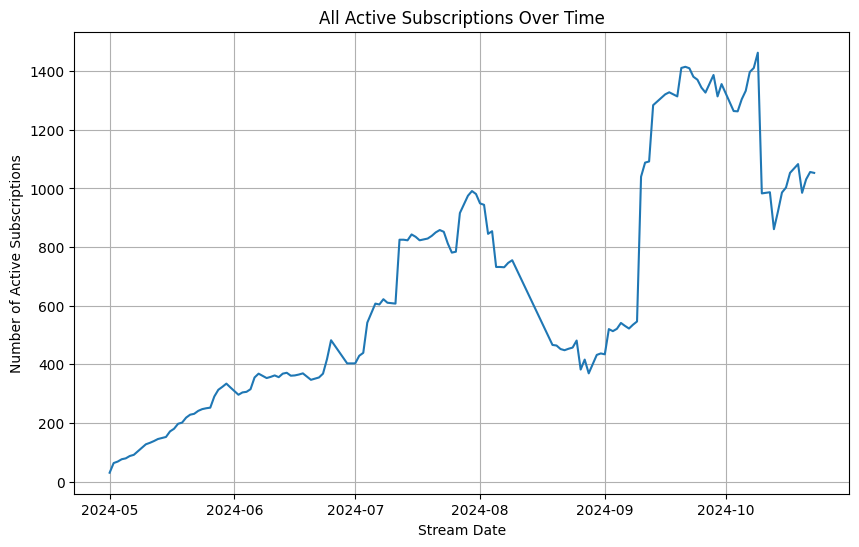

In [76]:
# Calculate the total subs for each stream
stream_stats['all_sub'] = stream_stats['tier1'] + stream_stats['tier2'] + stream_stats['tier3'] + stream_stats['prime'] + stream_stats['gift']

# Initialize a list to store the active subs for each date
active_all_subs = []

# Loop through each date in the dataframe
for i in range(len(stream_stats)):
    current_date = stream_stats.iloc[i]['stream_date']
    
    # Get the total subs in the last 30 days
    mask = (stream_stats['stream_date'] <= current_date) & \
           (stream_stats['stream_date'] > current_date - pd.Timedelta(days=30))
    active_sub_count = stream_stats.loc[mask, 'all_sub'].sum()
    
    active_all_subs.append(active_sub_count)

# Add this new series to the original dataframe
stream_stats['all_active_subs'] = active_all_subs

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(stream_stats['stream_date'], stream_stats['all_active_subs'])
plt.title('All Active Subscriptions Over Time')
plt.xlabel('Stream Date')
plt.ylabel('Number of Active Subscriptions')
plt.grid(True)
plt.show()

In [77]:
stream_stats['ad_rev'] = stream_stats['hours_watched'] * 0.72 / 100

stream_stats['ad_rev']

0       4.565826
1       5.420624
2       4.825044
3       4.641966
4       5.545264
         ...    
140    16.854880
141    16.117544
142    11.701620
143    18.132660
144     3.658856
Name: ad_rev, Length: 145, dtype: float64

In [78]:
stream_stats.tail(3)

,stream,first_messages,total_messages,unique_chatters,stream_length,stream_length_hour,stream_length_per_firt,unique_chatters_per_hour,first_messages_avg,unique_chatters_per_hour_avg,...,fnf,stream_date,active_subs,active_prime,active_tier2,active_tier3,active_gift,all_sub,all_active_subs,ad_rev
142,142,129,4258,456,18574.0,5.159444,25.002692,88.381609,97.958042,62.821229,...,0,2024-10-21,147.0,135.0,1.0,4.0,744.0,59.0,1031.0,11.701620
143,143,129,4918,503,18655.0,5.181944,24.894130,97.067810,98.173611,63.059052,...,0,2024-10-22,153.0,130.0,1.0,3.0,769.0,38.0,1056.0,18.132660
144,144,75,1579,271,6956.0,1.932222,38.815411,140.253019,98.013793,63.591425,...,0,2024-10-23,154.0,127.0,1.0,3.0,768.0,7.0,1053.0,3.658856


In [79]:
#stream_stats.to_csv('combined_output.csv', index=False)

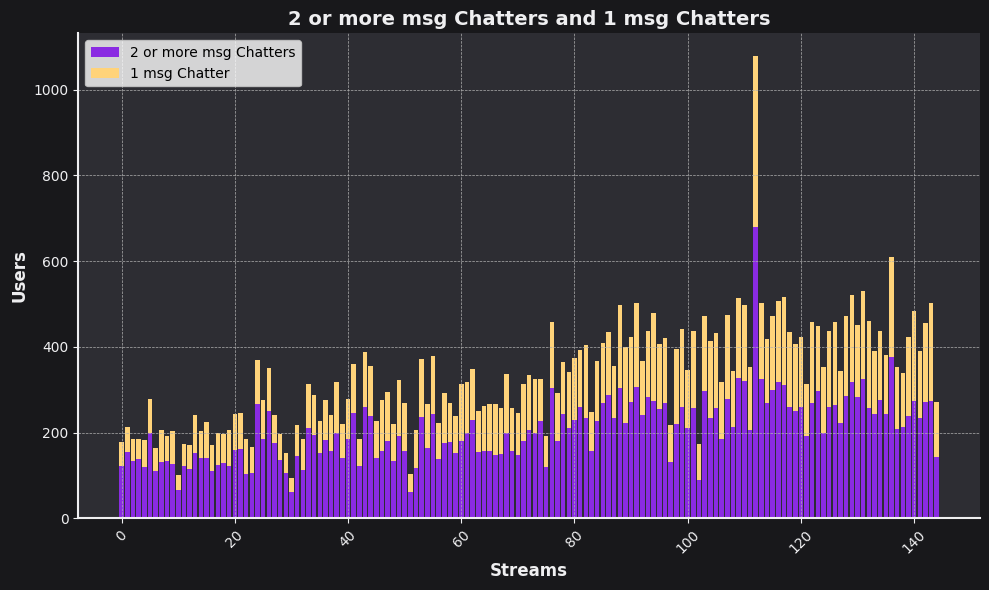

In [80]:
#one_message_user_count
#two_or_more_message_user_counts

# Plot the bars with specified colors
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Bar plot for all chatters
ax.bar(stream_stats.index, 
       stream_stats['two_or_more_message_user_counts'], 
       label='2 or more msg Chatters', 
       color='#8A2BE2',  # Custom color for the first set of bars (purple)
      )

# Bar plot for first-time chatters (stacked on top)
ax.bar(stream_stats.index, 
       stream_stats['one_message_user_count'],
       bottom=stream_stats['two_or_more_message_user_counts'],
       label='1 msg Chatter', 
       color='#FFD37A',  # Custom color for the second set of bars (yellow)
      )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('Users', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('2 or more msg Chatters and 1 msg Chatters', fontsize=14, fontweight='bold', color=label_color)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Adding legend to differentiate the bars
ax.legend()

# Rotating x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Adding grid with custom style
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


In [81]:
stream_stats['2mgs_per'] = stream_stats['two_or_more_message_user_counts'] / (stream_stats['two_or_more_message_user_counts'] + stream_stats['one_message_user_count']) * 100
stream_stats['1mgs_per'] = 100 - stream_stats['2mgs_per']

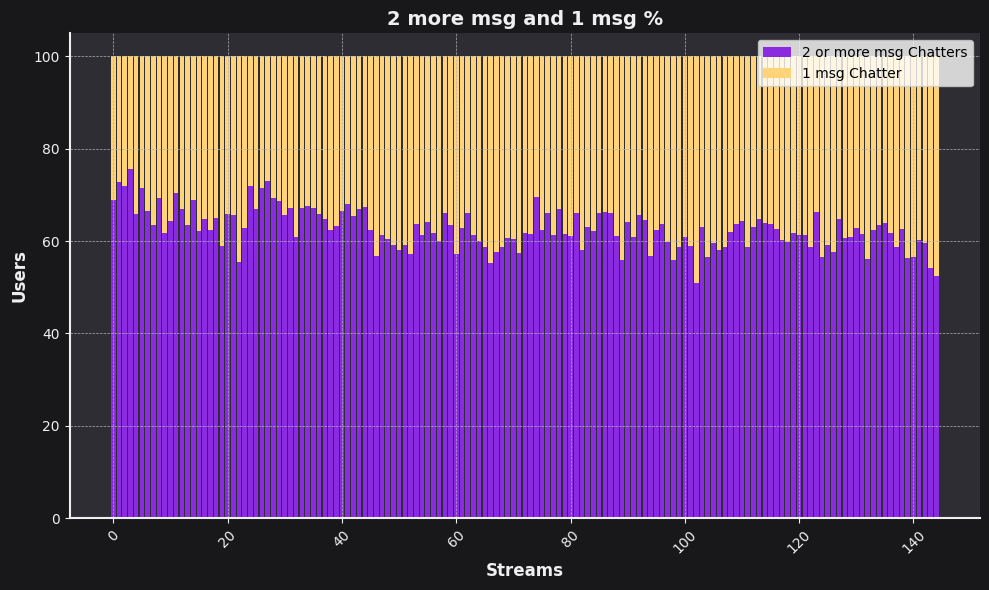

In [82]:
# Plot the bars with specified colors
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Bar plot for all chatters
ax.bar(stream_stats.index, 
       stream_stats['2mgs_per'], 
       label='2 or more msg Chatters', 
       color='#8A2BE2',  # Custom color for the first set of bars (purple)
      )

# Bar plot for first-time chatters (stacked on top)
ax.bar(stream_stats.index, 
       stream_stats['1mgs_per'],
       bottom=stream_stats['2mgs_per'],
       label='1 msg Chatter', 
       color='#FFD37A',  # Custom color for the second set of bars (yellow)
      )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('Users', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('2 more msg and 1 msg %', fontsize=14, fontweight='bold', color=label_color)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Adding legend to differentiate the bars
ax.legend()

# Rotating x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Changing tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Adding grid with custom style
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


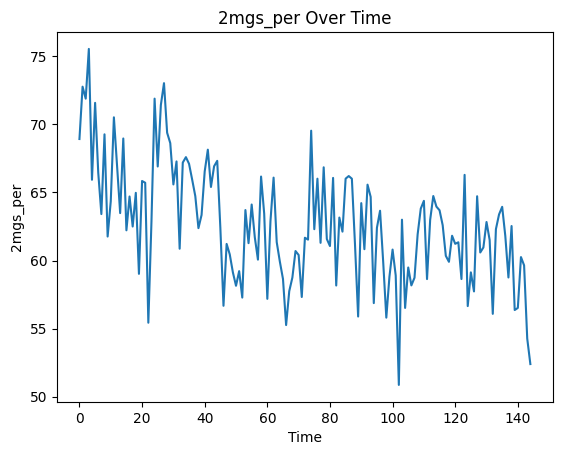

In [83]:
# Assuming stream_stats has a 'time' column or datetime index
plt.plot(stream_stats['stream'], stream_stats['2mgs_per'])
plt.title('2mgs_per Over Time')
plt.xlabel('Time')
plt.ylabel('2mgs_per')
plt.show()

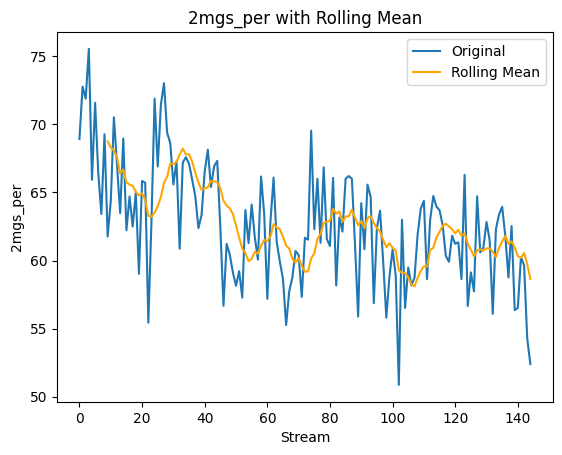

In [84]:
stream_stats['rolling_mean'] = stream_stats['2mgs_per'].rolling(window=10).mean()

plt.plot(stream_stats['stream'], stream_stats['2mgs_per'], label='Original')
plt.plot(stream_stats['stream'], stream_stats['rolling_mean'], label='Rolling Mean', color='orange')
plt.title('2mgs_per with Rolling Mean')
plt.xlabel('Stream')
plt.ylabel('2mgs_per')
plt.legend()
plt.show()


In [85]:
from sklearn.linear_model import LinearRegression

# Assuming 'time' is in datetime format, convert to numerical format
stream_stats['time_ordinal'] = pd.to_datetime(stream_stats['stream_date']).map(pd.Timestamp.toordinal)

X = stream_stats['time_ordinal'].values.reshape(-1, 1)
y = stream_stats['2mgs_per'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]

if slope > 0:
    print("The data is trending upwards.")
elif slope < 0:
    print("The data is trending downwards.")
else:
    print("The data is stagnating.")

The data is trending downwards.


In [86]:
import pymannkendall as mk

result = mk.original_test(stream_stats['2mgs_per'])
print(result)

Mann_Kendall_Test(trend='decreasing', h=True, p=1.7737944446594156e-10, z=-6.379748172405293, Tau=-0.3575670498084291, s=-3733.0, var_s=342197.0, slope=-0.05426656414435379, intercept=66.29657314936692)


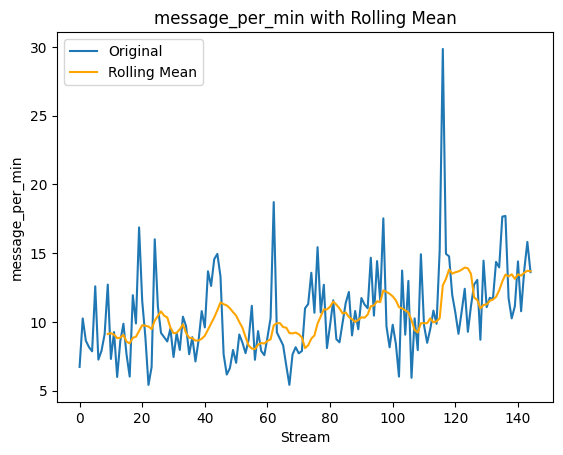

In [87]:
#message_per_min

stream_stats['message_per_min_mean'] = stream_stats['message_per_min'].rolling(window=10).mean()

plt.plot(stream_stats['stream'], stream_stats['message_per_min'], label='Original')
plt.plot(stream_stats['stream'], stream_stats['message_per_min_mean'], label='Rolling Mean', color='orange')
plt.title('message_per_min with Rolling Mean')
plt.xlabel('Stream')
plt.ylabel('message_per_min')
plt.legend()
plt.show()

In [88]:
initial_value = 97068
stream_stats['watch_hour'] = stream_stats['hours_watched'].cumsum() + initial_value

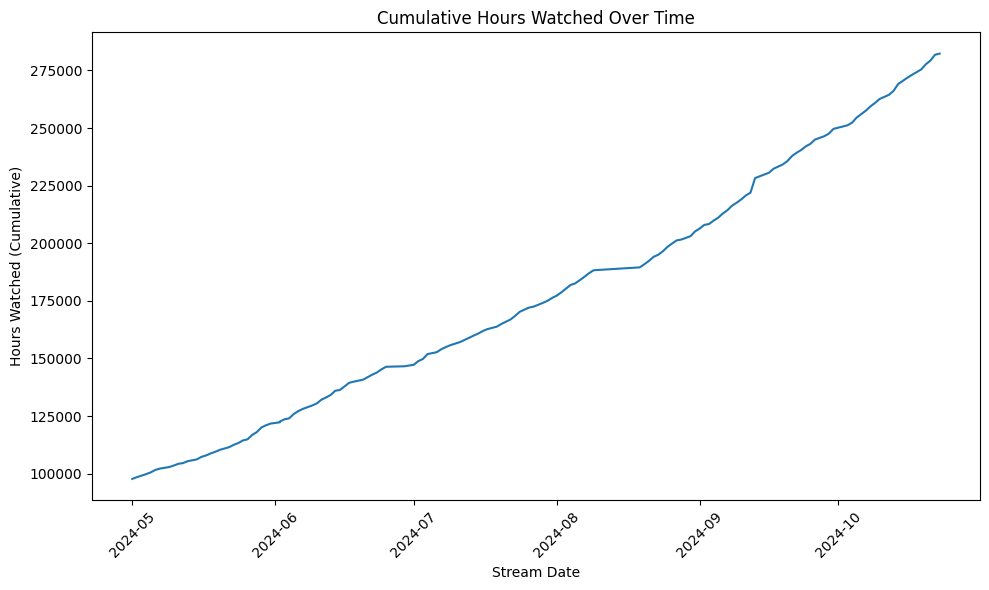

In [89]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stream_stats['stream_date'], stream_stats['watch_hour'])

# Labels and title
plt.xlabel('Stream Date')
plt.ylabel('Hours Watched (Cumulative)')
plt.title('Cumulative Hours Watched Over Time')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [90]:
stream_stats['watch_hour'].tail(1)

144    282315.298333
Name: watch_hour, dtype: float64

In [91]:
stream_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 86 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   stream                           145 non-null    int64         
 1   first_messages                   145 non-null    int64         
 2   total_messages                   145 non-null    int64         
 3   unique_chatters                  145 non-null    int64         
 4   stream_length                    145 non-null    float64       
 5   stream_length_hour               145 non-null    float64       
 6   stream_length_per_firt           145 non-null    float64       
 7   unique_chatters_per_hour         145 non-null    float64       
 8   first_messages_avg               145 non-null    float64       
 9   unique_chatters_per_hour_avg     145 non-null    float64       
 10  users                            145 non-null    object       

In [92]:
stream_stats['1mgs_per'].describe()

count    145.000000
mean      37.317374
std        4.352572
min       24.456522
25%       34.156379
50%       37.610619
75%       40.092166
max       49.132948
Name: 1mgs_per, dtype: float64

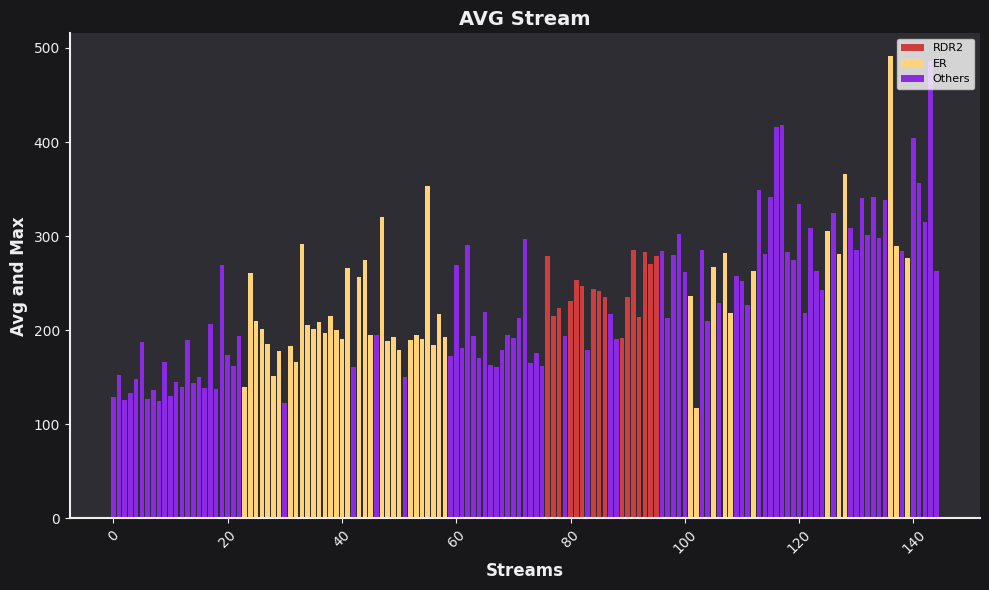

In [93]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

# Create a list of colors based on conditions for each bar
colors = ['#CD3E3E' if rdr2 == 1 else '#FFD37A' if er == 1 else '#8A2BE2' 
          for rdr2, er in zip(stream_stats['rdr2'], stream_stats['er'])]

# Bar plot with conditional coloring
ax.bar(stream_stats.index, 
       stream_stats['avg'], 
       color=colors
      )

# Set the background color of the figure (entire plot area)
fig.patch.set_facecolor('#18181B')

# Labels and title with custom color
label_color = '#EFEFF1'  # Color for the labels
ax.set_xlabel('Streams', fontsize=12, fontweight='bold', color=label_color)
ax.set_ylabel('Avg and Max', fontsize=12, fontweight='bold', color=label_color)
ax.set_title('AVG Stream', fontsize=14, fontweight='bold', color=label_color)

# Customizing the plot background and axes spines
ax.set_facecolor('#2D2D33')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color(label_color)
ax.spines['bottom'].set_color(label_color)

# Rotate x labels
plt.xticks(rotation=45, fontsize=10, color=label_color)

# Customize tick colors
ax.tick_params(axis='y', colors=label_color)
ax.tick_params(axis='x', colors=label_color)

# Create custom legend to explain color coding
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#CD3E3E', label='RDR2'),     # Red for 'rdr2 == 1'
    Patch(facecolor='#FFD37A', label='ER'),    # Yellow for 'er == 1'
    Patch(facecolor='#8A2BE2', label='Others')  # Purple for the rest
]
ax.legend(handles=legend_elements, fontsize=8, loc='upper right')

# Adjust layout and display plot
plt.tight_layout()
plt.show()
